# Data Exploration with Pandas - Week 1 Workshop

Data exploration is the foundation of any successful ML project. In this notebook, we'll master pandas techniques for understanding, cleaning, and preparing data for machine learning.

## Learning Objectives
- Master essential pandas operations
- Perform comprehensive data quality assessment
- Discover patterns and relationships in data
- Prepare data for machine learning

Let's dive in!

## 1. Loading and First Look at Data

In [11]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("🍷 Loading the Wine Dataset...")

# Load wine dataset
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df['target_name'] = wine_df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

print("✅ Wine Dataset Loaded Successfully!")
print(f"📊 Shape: {wine_df.shape}")
print(f"🎯 Features: {len(wine_data.feature_names)}")
print(f"🏷️ Classes: {wine_data.target_names}")

# Display first few rows
print("\n👀 First 5 rows:")
wine_df.head()

🍷 Loading the Wine Dataset...
✅ Wine Dataset Loaded Successfully!
📊 Shape: (178, 15)
🎯 Features: 13
🏷️ Classes: ['class_0' 'class_1' 'class_2']

👀 First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


## 2. Data Overview and Quality Assessment

In [12]:
print("📊 COMPREHENSIVE DATA OVERVIEW")
print("=" * 40)

# Basic dataset information
print("1. Dataset Dimensions:")
print(f"   Rows: {len(wine_df):,}")
print(f"   Columns: {len(wine_df.columns)}")
print(f"   Memory usage: {wine_df.memory_usage().sum() / 1024:.1f} KB")

# Data types analysis
print("\n2. Data Types Distribution:")
for dtype, count in wine_df.dtypes.value_counts().items():
    print(f"   {dtype}: {count} columns")

# Missing values analysis
print("\n3. Missing Values Check:")
missing_values = wine_df.isnull().sum()
total_missing = missing_values.sum()
print(f"   Total missing values: {total_missing}")

if total_missing > 0:
    print("   Columns with missing values:")
    for col, missing_count in missing_values[missing_values > 0].items():
        percentage = (missing_count / len(wine_df)) * 100
        print(f"      {col}: {missing_count} ({percentage:.1f}%)")
else:
    print("   ✅ No missing values found!")

# Basic statistics for numeric columns
print("\n4. Numeric Columns Summary:")
numeric_cols = wine_df.select_dtypes(include=[np.number]).columns
print(f"   Number of numeric columns: {len(numeric_cols)}")
print(f"   Numeric columns: {list(numeric_cols[:5])}{'...' if len(numeric_cols) > 5 else ''}")

# Display detailed statistics
wine_df.describe()

📊 COMPREHENSIVE DATA OVERVIEW
1. Dataset Dimensions:
   Rows: 178
   Columns: 15
   Memory usage: 21.0 KB

2. Data Types Distribution:
   float64: 13 columns
   int64: 1 columns
   object: 1 columns

3. Missing Values Check:
   Total missing values: 0
   ✅ No missing values found!

4. Numeric Columns Summary:
   Number of numeric columns: 14
   Numeric columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']...


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 3. Target Variable Analysis

🎯 TARGET VARIABLE ANALYSIS
1. Class Distribution:
target_name
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

   Class balance ratio: 0.676
   ⚠️ Moderately imbalanced classes

2. Class Percentages:
   class_1: 39.9%
   class_0: 33.1%
   class_2: 27.0%


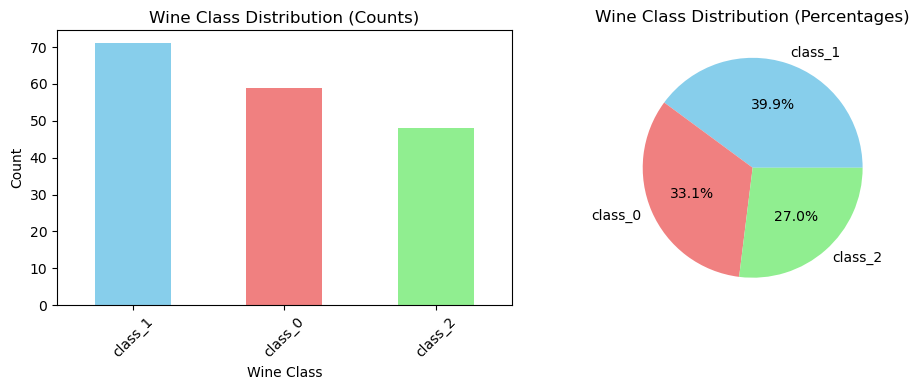


✅ Target variable analysis complete!


In [13]:
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 30)

# Class distribution
print("1. Class Distribution:")
class_counts = wine_df['target_name'].value_counts()
print(class_counts)

# Calculate class balance
class_balance = class_counts.min() / class_counts.max()
print(f"\n   Class balance ratio: {class_balance:.3f}")
if class_balance > 0.7:
    print("   ✅ Well-balanced classes")
elif class_balance > 0.5:
    print("   ⚠️ Moderately imbalanced classes")
else:
    print("   ❌ Highly imbalanced classes - consider resampling")

# Class percentages
print("\n2. Class Percentages:")
class_percentages = wine_df['target_name'].value_counts(normalize=True) * 100
for class_name, percentage in class_percentages.items():
    print(f"   {class_name}: {percentage:.1f}%")

# Visualize class distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Wine Class Distribution (Counts)')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
class_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Wine Class Distribution (Percentages)')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("\n✅ Target variable analysis complete!")

## 4. Feature Analysis and Relationships

🔍 FEATURE ANALYSIS
1. Feature Scales Analysis:
   Features with largest ranges:
      proline: 1402.0
      magnesium: 92.0
      alcalinity_of_ash: 19.4
      color_intensity: 11.7
      malic_acid: 5.1

   Features with highest scale ratios:
      flavanoids: 14.9x
      color_intensity: 10.2x
      proanthocyanins: 8.7x
      malic_acid: 7.8x
      proline: 6.0x

   ✅ Feature scales are relatively similar

2. Feature-Target Correlations:
   Strongest correlations with target:
      flavanoids: 0.847 (Strong)
      od280/od315_of_diluted_wines: 0.788 (Strong)
      total_phenols: 0.719 (Strong)
      proline: 0.634 (Strong)
      hue: 0.617 (Strong)
      alcalinity_of_ash: 0.518 (Strong)
      proanthocyanins: 0.499 (Moderate)
      nonflavanoid_phenols: 0.489 (Moderate)


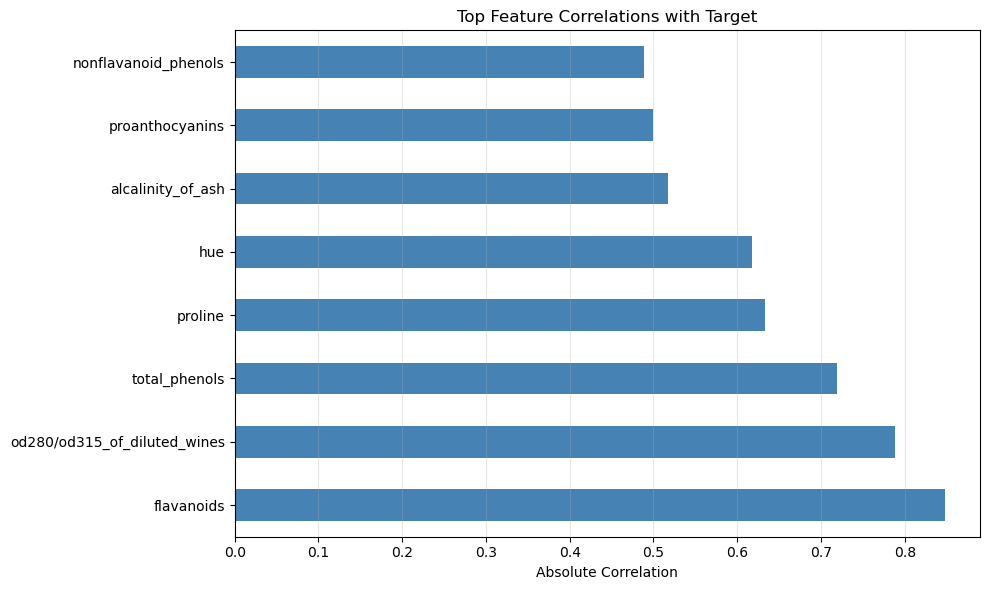

In [4]:
print("🔍 FEATURE ANALYSIS")
print("=" * 20)

# Feature ranges and scales
print("1. Feature Scales Analysis:")
numeric_features = wine_df.select_dtypes(include=[np.number]).drop(['target'], axis=1)
feature_ranges = numeric_features.max() - numeric_features.min()
feature_scales = numeric_features.max() / numeric_features.min()

print(f"   Features with largest ranges:")
top_ranges = feature_ranges.nlargest(5)
for feature, range_val in top_ranges.items():
    print(f"      {feature}: {range_val:.1f}")

print(f"\n   Features with highest scale ratios:")
top_scales = feature_scales.nlargest(5)
for feature, scale_ratio in top_scales.items():
    print(f"      {feature}: {scale_ratio:.1f}x")

# Check for features that need scaling
features_need_scaling = feature_scales[feature_scales > 100]
if len(features_need_scaling) > 0:
    print(f"\n   ⚠️ Features that likely need scaling:")
    for feature in features_need_scaling.index:
        print(f"      {feature}")
else:
    print("\n   ✅ Feature scales are relatively similar")

# Feature correlations with target
print("\n2. Feature-Target Correlations:")
target_correlations = numeric_features.corrwith(wine_df['target']).abs().sort_values(ascending=False)

print("   Strongest correlations with target:")
top_correlations = target_correlations.head(8)
for feature, correlation in top_correlations.items():
    strength = "Strong" if correlation > 0.5 else "Moderate" if correlation > 0.3 else "Weak"
    print(f"      {feature}: {correlation:.3f} ({strength})")

# Visualize top correlations
plt.figure(figsize=(10, 6))
top_correlations.plot(kind='barh', color='steelblue')
plt.title('Top Feature Correlations with Target')
plt.xlabel('Absolute Correlation')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature-Feature Correlations

🔗 FEATURE-FEATURE CORRELATION ANALYSIS
1. Highly Correlated Feature Pairs (|r| > 0.7):
   total_phenols ↔ flavanoids: 0.865 (Positive)
   flavanoids ↔ od280/od315_of_diluted_wines: 0.787 (Positive)

2. Correlation Heatmap (Top 10 Features):


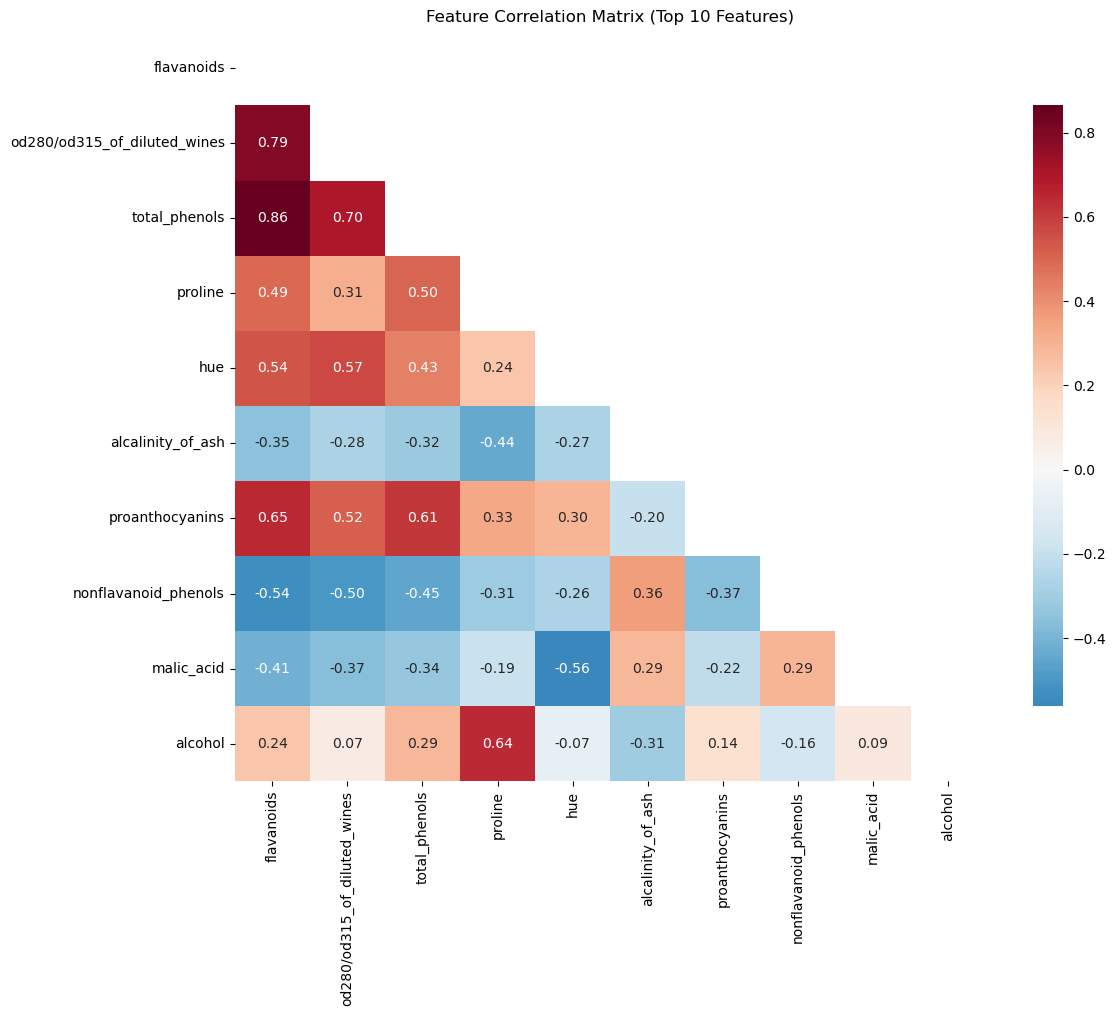


3. Multicollinearity Assessment:
   ⚠️ Features with potential multicollinearity: 2
      flavanoids
      total_phenols
   💡 Consider feature selection or dimensionality reduction


In [5]:
print("🔗 FEATURE-FEATURE CORRELATION ANALYSIS")
print("=" * 40)

# Calculate correlation matrix
corr_matrix = numeric_features.corr()

# Find highly correlated feature pairs
print("1. Highly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        if abs(correlation) > 0.7:
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            high_corr_pairs.append((feature1, feature2, correlation))

if high_corr_pairs:
    for feature1, feature2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        corr_type = "Positive" if corr > 0 else "Negative"
        print(f"   {feature1} ↔ {feature2}: {corr:.3f} ({corr_type})")
else:
    print("   ✅ No highly correlated feature pairs found")

# Create correlation heatmap for selected features
print("\n2. Correlation Heatmap (Top 10 Features):")
top_features = target_correlations.head(10).index
top_corr_matrix = wine_df[top_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(top_corr_matrix, dtype=bool))
sns.heatmap(top_corr_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Top 10 Features)')
plt.tight_layout()
plt.show()

# Feature multicollinearity check
print("\n3. Multicollinearity Assessment:")
highly_correlated_features = []
for feature1, feature2, corr in high_corr_pairs:
    if abs(corr) > 0.8:
        highly_correlated_features.extend([feature1, feature2])

if highly_correlated_features:
    unique_features = list(set(highly_correlated_features))
    print(f"   ⚠️ Features with potential multicollinearity: {len(unique_features)}")
    for feature in unique_features[:5]:  # Show first 5
        print(f"      {feature}")
    print("   💡 Consider feature selection or dimensionality reduction")
else:
    print("   ✅ No significant multicollinearity detected")

## 6. Outlier Detection and Analysis

🎯 OUTLIER DETECTION ANALYSIS
1. Outlier Analysis for Key Features:
   flavanoids:
      Outliers: 0 (0.0%)
      Normal range: [-1.30, 5.38]
   od280/od315_of_diluted_wines:
      Outliers: 0 (0.0%)
      Normal range: [0.09, 5.02]
   total_phenols:
      Outliers: 0 (0.0%)
      Normal range: [0.16, 4.39]
   proline:
      Outliers: 0 (0.0%)
      Normal range: [-226.25, 1711.75]
   hue:
      Outliers: 1 (0.6%)
      Normal range: [0.28, 1.63]

2. Outlier Visualization:


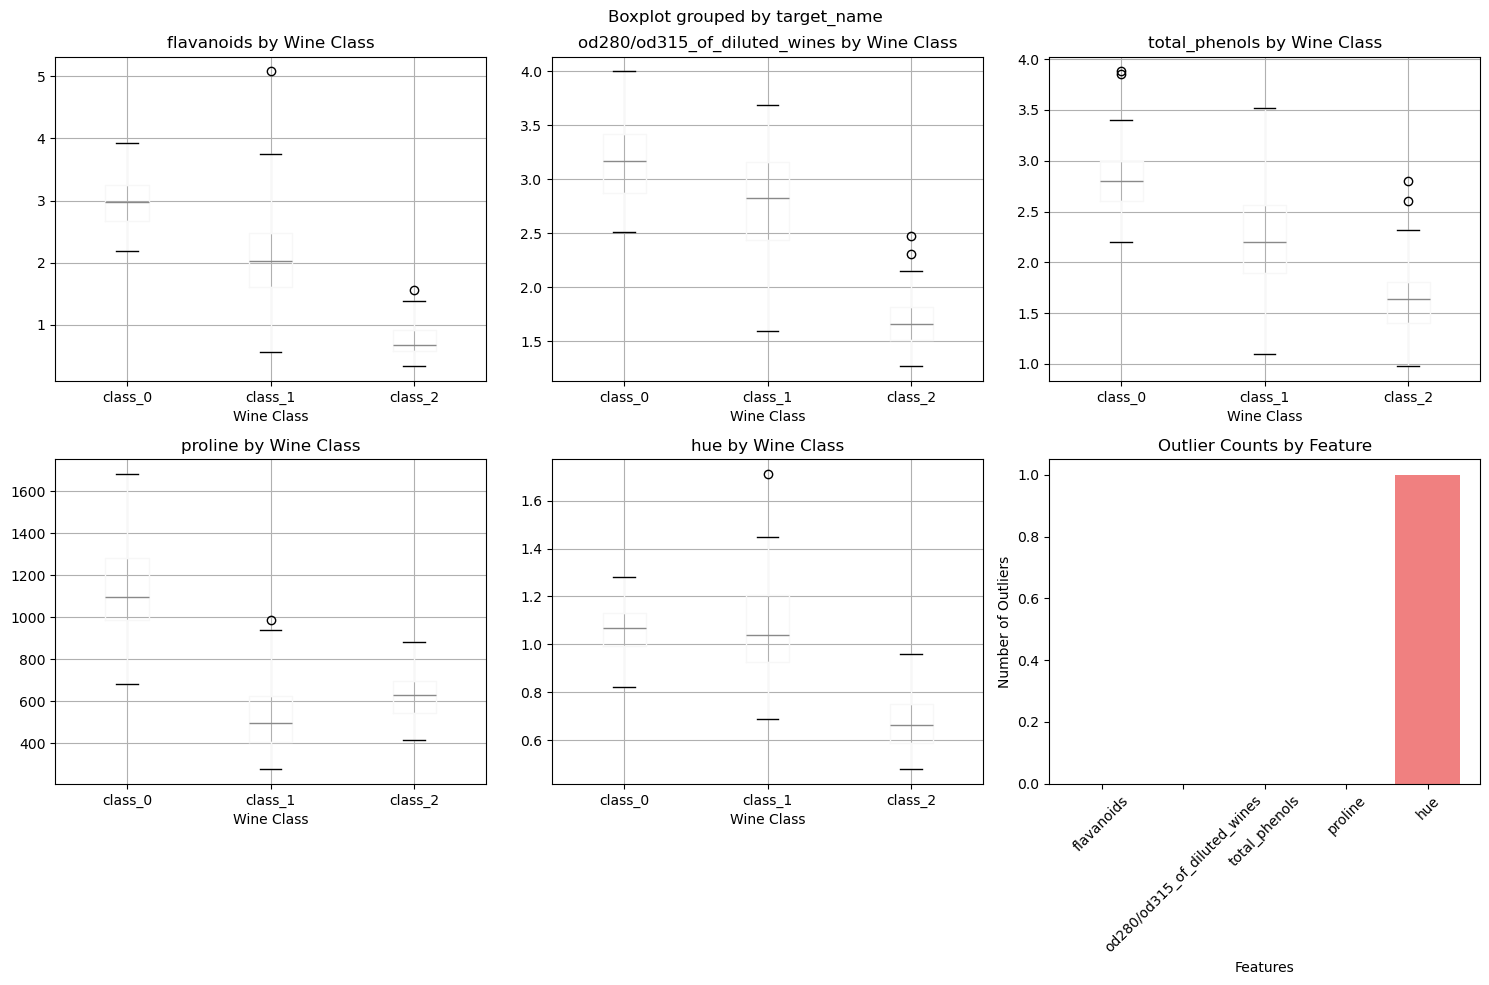


3. Overall Outlier Summary:
   Total outlier instances: 1
   Average outliers per feature: 0.2
   ✅ Outlier levels appear normal for this dataset


In [6]:
print("🎯 OUTLIER DETECTION ANALYSIS")
print("=" * 30)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for top features
print("1. Outlier Analysis for Key Features:")
outlier_summary = {}

for feature in top_correlations.head(5).index:
    outliers, lower, upper = detect_outliers_iqr(wine_df, feature)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(wine_df)) * 100
    
    outlier_summary[feature] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'bounds': (lower, upper)
    }
    
    print(f"   {feature}:")
    print(f"      Outliers: {outlier_count} ({outlier_percentage:.1f}%)")
    print(f"      Normal range: [{lower:.2f}, {upper:.2f}]")

# Visualize outliers with box plots
print("\n2. Outlier Visualization:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

top_5_features = top_correlations.head(5).index
for idx, feature in enumerate(top_5_features):
    wine_df.boxplot(column=feature, by='target_name', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Wine Class')
    axes[idx].set_xlabel('Wine Class')

# Overall outlier distribution
axes[5].bar(outlier_summary.keys(), [v['count'] for v in outlier_summary.values()], 
           color='lightcoral')
axes[5].set_title('Outlier Counts by Feature')
axes[5].set_xlabel('Features')
axes[5].set_ylabel('Number of Outliers')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Overall outlier assessment
total_outliers = sum([v['count'] for v in outlier_summary.values()])
print(f"\n3. Overall Outlier Summary:")
print(f"   Total outlier instances: {total_outliers}")
print(f"   Average outliers per feature: {total_outliers / len(outlier_summary):.1f}")

if total_outliers > len(wine_df) * 0.1:
    print("   ⚠️ High number of outliers detected - investigate data quality")
else:
    print("   ✅ Outlier levels appear normal for this dataset")

## 7. Feature Distribution Analysis

📊 FEATURE DISTRIBUTION ANALYSIS
1. Distribution Analysis for Key Features:

   flavanoids:
      Mean: 2.029, Median: 2.135
      Skewness: 0.025 (Nearly symmetric)
      Kurtosis: -0.880

   od280/od315_of_diluted_wines:
      Mean: 2.612, Median: 2.780
      Skewness: -0.307 (Nearly symmetric)
      Kurtosis: -1.086

   total_phenols:
      Mean: 2.295, Median: 2.355
      Skewness: 0.087 (Nearly symmetric)
      Kurtosis: -0.836

   proline:
      Mean: 746.893, Median: 673.500
      Skewness: 0.768 (Moderately skewed)
      Kurtosis: -0.248

   hue:
      Mean: 0.957, Median: 0.965
      Skewness: 0.021 (Nearly symmetric)
      Kurtosis: -0.344

   alcalinity_of_ash:
      Mean: 19.495, Median: 19.500
      Skewness: 0.213 (Nearly symmetric)
      Kurtosis: 0.488

2. Distribution Visualizations:


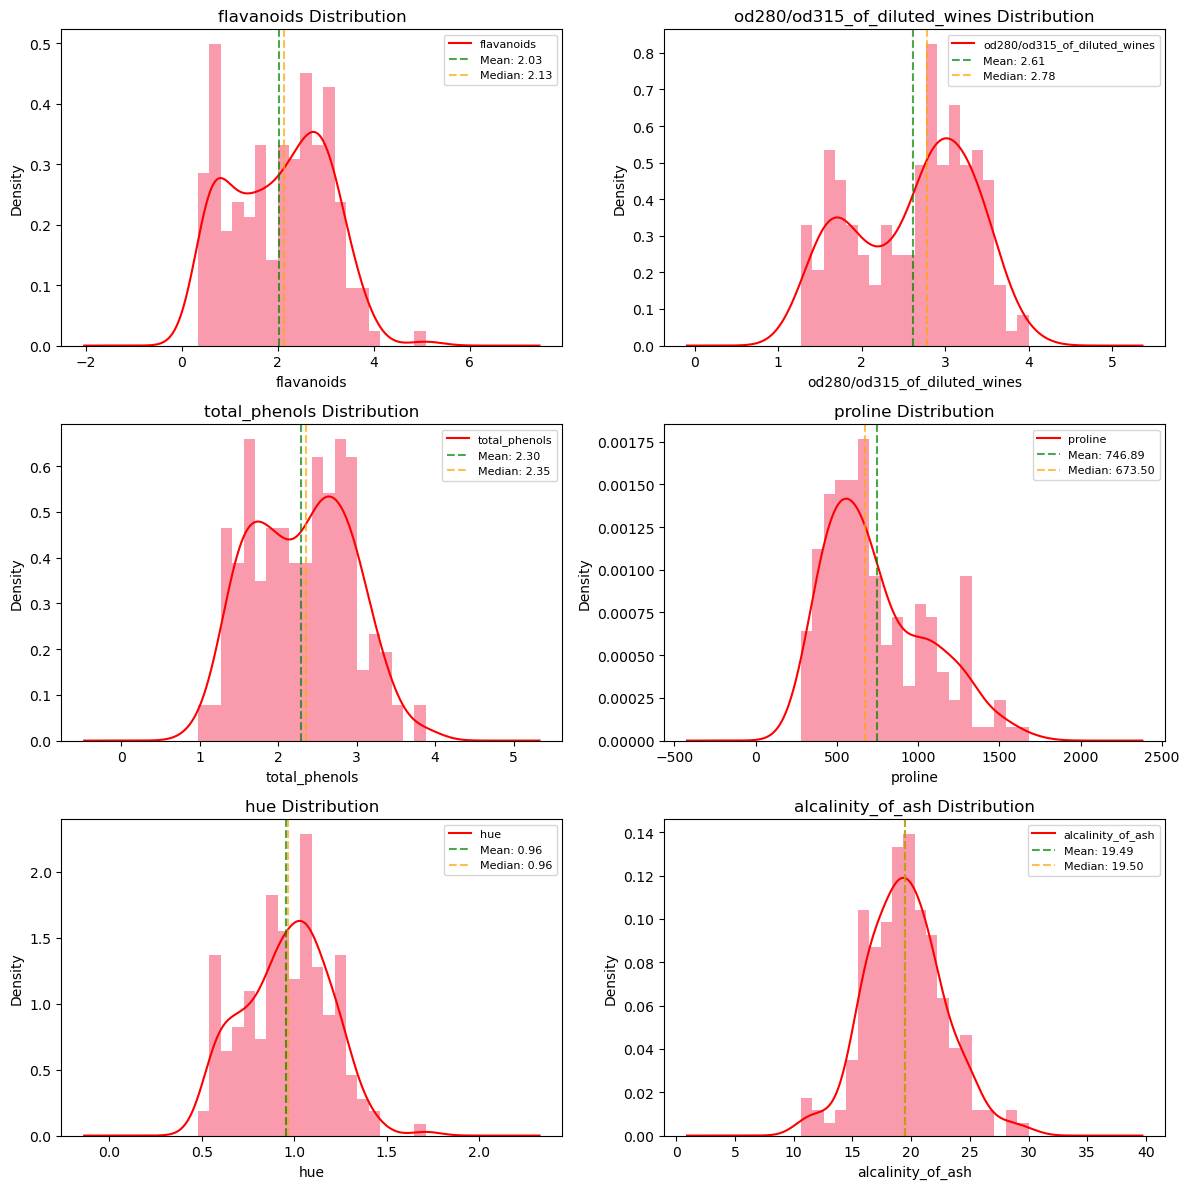


3. Normality Assessment:
   Features with significant skewness: 1
      proline (skewness: 0.768)
   💡 Consider log transformation or other normalization techniques
   ✅ Features with normal-like distributions: 5
      flavanoids
      od280/od315_of_diluted_wines
      total_phenols


In [7]:
print("📊 FEATURE DISTRIBUTION ANALYSIS")
print("=" * 35)

def analyze_distribution(data, column):
    """Analyze the distribution of a feature"""
    # Basic statistics
    mean_val = data[column].mean()
    median_val = data[column].median()
    std_val = data[column].std()
    
    # Skewness and kurtosis
    skewness = data[column].skew()
    kurtosis = data[column].kurtosis()
    
    # Distribution assessment
    if abs(skewness) < 0.5:
        skew_assessment = "Nearly symmetric"
    elif abs(skewness) < 1.0:
        skew_assessment = "Moderately skewed"
    else:
        skew_assessment = "Highly skewed"
    
    return {
        'mean': mean_val,
        'median': median_val,
        'std': std_val,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'skew_assessment': skew_assessment
    }

print("1. Distribution Analysis for Key Features:")
distribution_analysis = {}

for feature in top_correlations.head(6).index:
    analysis = analyze_distribution(wine_df, feature)
    distribution_analysis[feature] = analysis
    
    print(f"\n   {feature}:")
    print(f"      Mean: {analysis['mean']:.3f}, Median: {analysis['median']:.3f}")
    print(f"      Skewness: {analysis['skewness']:.3f} ({analysis['skew_assessment']})")
    print(f"      Kurtosis: {analysis['kurtosis']:.3f}")

# Visualize distributions
print("\n2. Distribution Visualizations:")
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

for idx, feature in enumerate(top_correlations.head(6).index):
    # Histogram with KDE
    wine_df[feature].hist(bins=20, alpha=0.7, ax=axes[idx], density=True)
    wine_df[feature].plot(kind='kde', ax=axes[idx], color='red')
    
    axes[idx].set_title(f'{feature} Distribution')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')
    
    # Add mean and median lines
    mean_val = wine_df[feature].mean()
    median_val = wine_df[feature].median()
    axes[idx].axvline(mean_val, color='green', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

# Normality assessment
print("\n3. Normality Assessment:")
skewed_features = []
normal_features = []

for feature, analysis in distribution_analysis.items():
    if abs(analysis['skewness']) > 0.5:
        skewed_features.append(feature)
    else:
        normal_features.append(feature)

if skewed_features:
    print(f"   Features with significant skewness: {len(skewed_features)}")
    for feature in skewed_features[:3]:  # Show first 3
        print(f"      {feature} (skewness: {distribution_analysis[feature]['skewness']:.3f})")
    print("   💡 Consider log transformation or other normalization techniques")

if normal_features:
    print(f"   ✅ Features with normal-like distributions: {len(normal_features)}")
    for feature in normal_features[:3]:  # Show first 3
        print(f"      {feature}")

## 8. Class-Specific Analysis

🏷️ CLASS-SPECIFIC FEATURE ANALYSIS
1. Feature Means by Wine Class:
             flavanoids  od280/od315_of_diluted_wines  total_phenols  \
target_name                                                            
class_0           2.982                         3.158          2.840   
class_1           2.081                         2.785          2.259   
class_2           0.781                         1.684          1.679   

              proline    hue  
target_name                   
class_0      1115.712  1.062  
class_1       519.507  1.056  
class_2       629.896  0.683  

2. Features with Largest Class Differences:
   proline: 596.205
      Highest: class_0 (1115.712)
      Lowest: class_1 (519.507)
   flavanoids: 2.201
      Highest: class_0 (2.982)
      Lowest: class_2 (0.781)
   od280/od315_of_diluted_wines: 1.474
      Highest: class_0 (3.158)
      Lowest: class_2 (1.684)
   total_phenols: 1.161
      Highest: class_0 (2.840)
      Lowest: class_2 (1.679)
   hue: 0.379
     

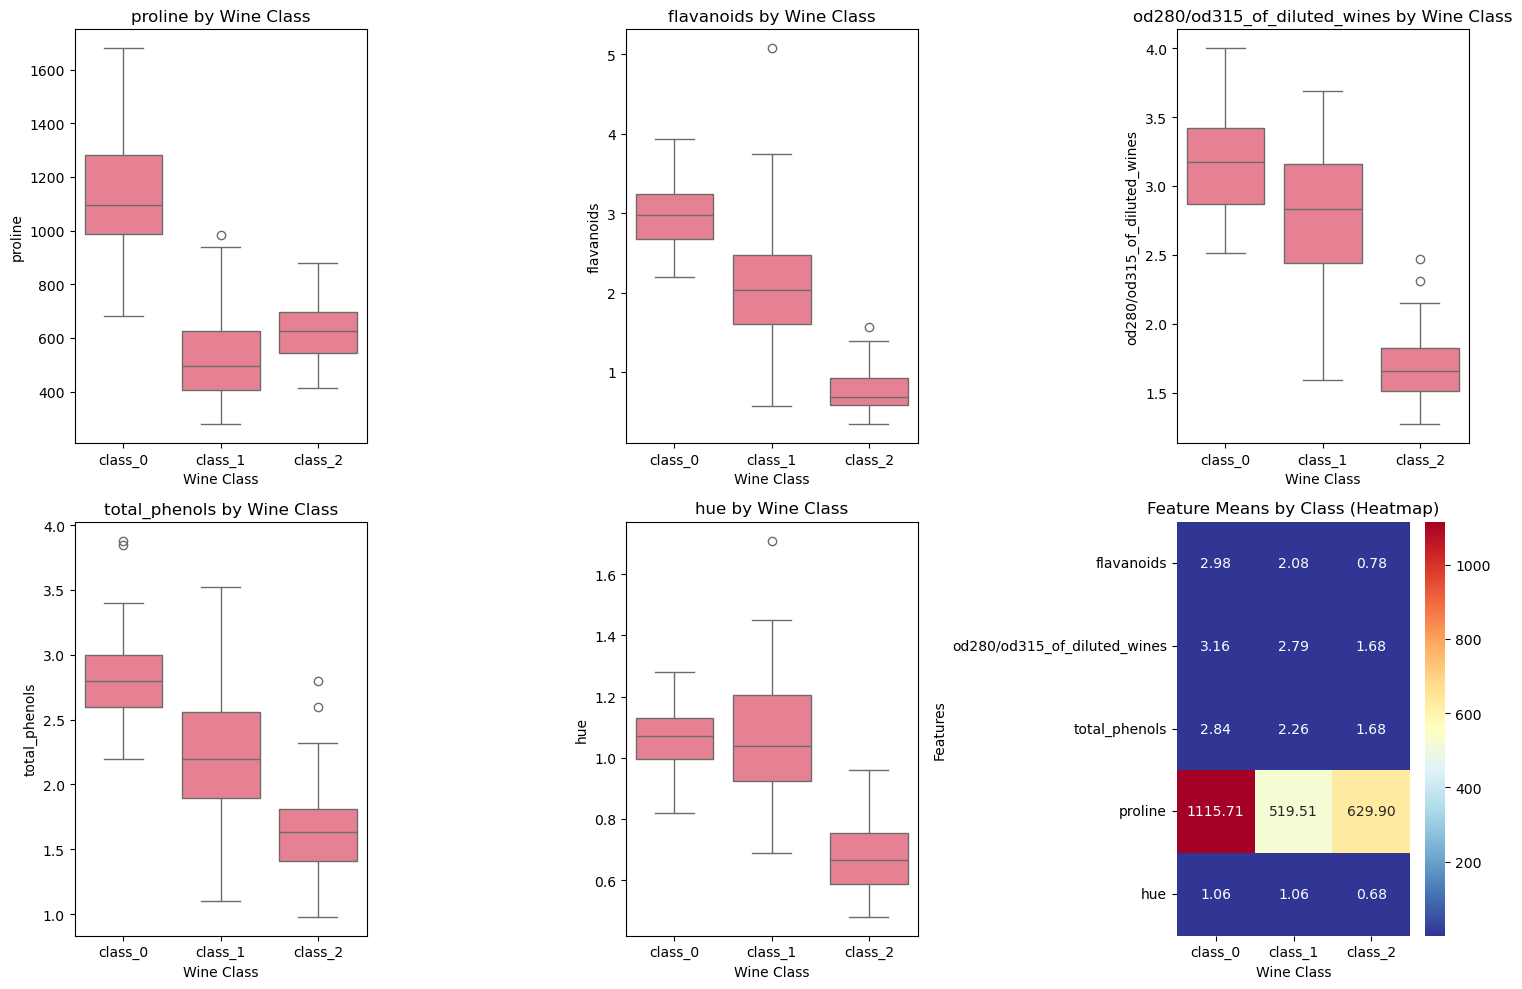


4. Statistical Significance (ANOVA F-statistic):
   proline: F=207.920, p=5.783e-47 ***
   flavanoids: F=233.926, p=3.599e-50 ***
   od280/od315_of_diluted_wines: F=189.972, p=1.393e-44 ***
   total_phenols: F=93.733, p=2.138e-28 ***
   hue: F=101.317, p=5.918e-30 ***

   ✅ Significant features for class discrimination: 5
   💡 These features show significant differences between wine classes


In [8]:
print("🏷️ CLASS-SPECIFIC FEATURE ANALYSIS")
print("=" * 35)

# Analyze feature means by class
print("1. Feature Means by Wine Class:")
class_means = wine_df.groupby('target_name')[top_correlations.head(5).index].mean()
print(class_means.round(3))

# Find features with largest class differences
print("\n2. Features with Largest Class Differences:")
class_ranges = class_means.max() - class_means.min()
top_discriminative = class_ranges.sort_values(ascending=False)

for feature, range_val in top_discriminative.head(5).items():
    print(f"   {feature}: {range_val:.3f}")
    # Show which class has highest/lowest values
    feature_by_class = class_means[feature]
    highest_class = feature_by_class.idxmax()
    lowest_class = feature_by_class.idxmin()
    print(f"      Highest: {highest_class} ({feature_by_class[highest_class]:.3f})")
    print(f"      Lowest: {lowest_class} ({feature_by_class[lowest_class]:.3f})")

# Visualize class differences
print("\n3. Class Comparison Visualizations:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Box plots for top discriminative features
for idx, feature in enumerate(top_discriminative.head(5).index):
    sns.boxplot(data=wine_df, x='target_name', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Wine Class')
    axes[idx].set_xlabel('Wine Class')

# Feature means heatmap
sns.heatmap(class_means.T, annot=True, cmap='RdYlBu_r', ax=axes[5], fmt='.2f')
axes[5].set_title('Feature Means by Class (Heatmap)')
axes[5].set_xlabel('Wine Class')
axes[5].set_ylabel('Features')

plt.tight_layout()
plt.show()

# Statistical significance testing
print("\n4. Statistical Significance (ANOVA F-statistic):")
from scipy import stats

significant_features = []
for feature in top_discriminative.head(5).index:
    # Perform ANOVA
    groups = [wine_df[wine_df['target_name'] == class_name][feature] 
              for class_name in wine_df['target_name'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    print(f"   {feature}: F={f_stat:.3f}, p={p_value:.3e} {significance}")
    
    if p_value < 0.05:
        significant_features.append(feature)

print(f"\n   ✅ Significant features for class discrimination: {len(significant_features)}")
print("   💡 These features show significant differences between wine classes")

## 9. Data Quality Summary and Recommendations

In [9]:
print("📋 DATA EXPLORATION SUMMARY")
print("=" * 30)

# Compile overall assessment
print("1. Dataset Quality Assessment:")
quality_score = 0
max_score = 5

# Check missing values
if total_missing == 0:
    print("   ✅ No missing values")
    quality_score += 1
else:
    print(f"   ⚠️ {total_missing} missing values ({(total_missing/len(wine_df)*100):.1f}%)")

# Check class balance
if class_balance > 0.7:
    print("   ✅ Well-balanced target classes")
    quality_score += 1
else:
    print(f"   ⚠️ Imbalanced classes (ratio: {class_balance:.3f})")

# Check feature discrimination
if len(significant_features) >= 3:
    print(f"   ✅ {len(significant_features)} features significantly discriminate classes")
    quality_score += 1
else:
    print(f"   ⚠️ Only {len(significant_features)} significantly discriminative features")

# Check multicollinearity
if len(high_corr_pairs) <= 3:
    print("   ✅ Low multicollinearity between features")
    quality_score += 1
else:
    print(f"   ⚠️ {len(high_corr_pairs)} highly correlated feature pairs")

# Check outliers
outlier_rate = total_outliers / (len(wine_df) * len(outlier_summary))
if outlier_rate < 0.05:
    print("   ✅ Low outlier rate")
    quality_score += 1
else:
    print(f"   ⚠️ High outlier rate ({outlier_rate:.1%})")

print(f"\n   Overall Quality Score: {quality_score}/{max_score} ({'Excellent' if quality_score >= 4 else 'Good' if quality_score >= 3 else 'Fair'})")

print("\n2. Key Insights:")
print(f"   📊 Dataset has {len(wine_df)} samples with {len(numeric_features.columns)} features")
print(f"   🎯 {len(significant_features)} features strongly discriminate between classes")
print(f"   🔗 {len(high_corr_pairs)} highly correlated feature pairs detected")
print(f"   📈 Top predictive feature: {top_correlations.index[0]} (r={top_correlations.iloc[0]:.3f})")

print("\n3. Recommendations for ML Pipeline:")

# Feature scaling recommendation
if len(features_need_scaling) > 0:
    print("   🔧 Apply feature scaling (StandardScaler recommended)")
    print(f"      Features needing scaling: {len(features_need_scaling)}")

# Feature selection recommendation
if len(high_corr_pairs) > 3:
    print("   ✂️ Consider feature selection to reduce multicollinearity")
    print(f"      Correlated pairs to review: {len(high_corr_pairs)}")

# Outlier handling recommendation
if outlier_rate > 0.05:
    print("   🎯 Consider outlier detection and handling")
    print("      Methods: IQR filtering, Isolation Forest, or robust scaling")

# Data transformation recommendation
if len(skewed_features) > 0:
    print("   📐 Consider transforming skewed features")
    print("      Methods: Log transformation, Box-Cox, or Yeo-Johnson")

# Model selection recommendation
print("   🤖 Recommended algorithms:")
if quality_score >= 4:
    print("      - Random Forest (handles feature interactions well)")
    print("      - SVM (good for this dataset size)")
    print("      - Logistic Regression (if interpretability needed)")
else:
    print("      - Random Forest (robust to data quality issues)")
    print("      - Gradient Boosting (handles complex patterns)")

print("\n✅ Data exploration complete! Ready for machine learning pipeline.")
print("💡 Next: Feature preprocessing and model training with Metaflow")

📋 DATA EXPLORATION SUMMARY
1. Dataset Quality Assessment:
   ✅ No missing values
   ⚠️ Imbalanced classes (ratio: 0.676)
   ✅ 5 features significantly discriminate classes
   ✅ Low multicollinearity between features
   ✅ Low outlier rate

   Overall Quality Score: 4/5 (Excellent)

2. Key Insights:
   📊 Dataset has 178 samples with 13 features
   🎯 5 features strongly discriminate between classes
   🔗 2 highly correlated feature pairs detected
   📈 Top predictive feature: flavanoids (r=0.847)

3. Recommendations for ML Pipeline:
   📐 Consider transforming skewed features
      Methods: Log transformation, Box-Cox, or Yeo-Johnson
   🤖 Recommended algorithms:
      - Random Forest (handles feature interactions well)
      - SVM (good for this dataset size)
      - Logistic Regression (if interpretability needed)

✅ Data exploration complete! Ready for machine learning pipeline.
💡 Next: Feature preprocessing and model training with Metaflow
